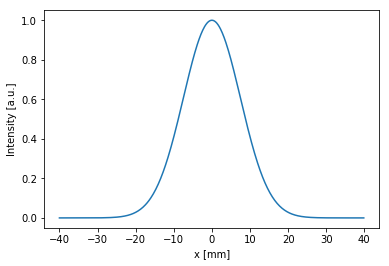

NameError: name 'gaussian' is not defined

In [3]:
from LightPipes import *
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import pylab as pl
import numpy as np
#%run '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/utilities.ipynb'

def intensity_screener(GridSize, GridDimension, Field, waist_values):
    NewGridDimension=int(GridDimension/4)
    Field=Interpol(GridSize,NewGridDimension,0,0,0,1,Field)
    I=Intensity(0,Field)
    tmp_x = []
    for i in range(NewGridDimension):
        tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm) 
    plt.plot(tmp_x,I[int(NewGridDimension/2)])
    plt.xlabel('x [mm]')
    plt.ylabel('Intensity [a.u.]')
    plt.show()
    arr = [tmp_x, I[int(NewGridDimension/2)]]
    popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
    print("print current beam size value: ", 2*popt[2])
    waist_values.append(2*popt[2])



GridSize = 80*mm
GridDimension = 2000
lambda_ = 527*nm

waist_values = []
pos = []

#ask brendan about this
R=(15)*mm
xs =0;ys=0
Field = Begin(GridSize, lambda_, GridDimension)

#Field = GaussAperture(R,xs,ys,1,Field)
Field = GaussHermite(0, 0, 1, R, Field)
#######
NewGridDimension=int(GridDimension/4)
Field=Interpol(GridSize,NewGridDimension,0,0,0,1,Field)
I=Intensity(0,Field)
tmp_x = []
for i in range(NewGridDimension):
    tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm)
plt.plot(tmp_x,I[int(NewGridDimension/2)])
plt.xlabel('x [mm]')
plt.ylabel('Intensity [a.u.]')
plt.show()
    
arr = [tmp_x, I[int(NewGridDimension/2)]]
popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
print(2*popt[2])
waist_values.append(2*popt[2])
#########
posfar_short= [0]
    
Field = Forvard(541*mm, Field)

NewGridDimension=int(GridDimension/4)
Field=Interpol(GridSize,NewGridDimension,0,0,0,1,Field)
I=Intensity(0,Field)

tmp_x = []
for i in range(NewGridDimension):
    tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm) 

arr = [tmp_x, I[int(NewGridDimension/2)]]
popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
print(2*popt[2])
waist_values.append(2*popt[2])


Field = Forvard(27*mm, Field)
posfar_short.append(posfar_short[-1]+541)


f1 = 568*mm
f2 = 1600*mm
f_relay = 6200*mm
#let's put the lens
Field = Lens(f1,0,0,Field)

drift_l1_m2 = [517]*4


for i in drift_l1_m2:
    Field =Forvard(i*mm, Field)
    posfar_short.append(posfar_short[-1] +i)
    NewGridDimension=int(GridDimension/4)
    Field=Interpol(GridSize,NewGridDimension,0,0,0,1,Field)
    I=Intensity(0,Field)
    tmp_x = []
    for i in range(NewGridDimension):
        tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm)
    plt.plot(tmp_x,I[int(NewGridDimension/2)])
    plt.xlabel('x [mm]')
    plt.ylabel('Intensity [a.u.]')
    plt.show()
    
    arr = [tmp_x, I[int(NewGridDimension/2)]]
    popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
    print(2*popt[2])
    waist_values.append(2*popt[2])
    
Field = Forvard(100*mm, Field)   
Field = Lens(f2,0,0,Field)

drift_l2_m3 = [770.5]*4

for i in drift_l2_m3:
    Field =Forvard(i*mm, Field)
    posfar_short.append(posfar_short[-1] +i)
    NewGridDimension=int(GridDimension/4)
    Field=Interpol(GridSize,NewGridDimension,0,0,0,1,Field)
    I=Intensity(0,Field)
    tmp_x = []
    for i in range(NewGridDimension):
        tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm)
    plt.plot(tmp_x,I[int(NewGridDimension/2)])
    plt.xlabel('x [mm]')
    plt.ylabel('Intensity [a.u.]')
    plt.show()

    
    arr = [tmp_x, I[int(NewGridDimension/2)]]
    popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
    print(2*popt[2])
    waist_values.append(2*popt[2])

print(posfar_short)


print('element_id   ', "waist value", "pos")
for i in range(len(waist_values)):
    print(i, waist_values[i], posfar_short[i])


jet = plt.figure(figsize=(10,10))
j0 = jet.add_subplot(221)
j0.imshow(I, cmap='jet'); plt.axis('off')
j1 = jet.add_subplot(222)
j1.scatter(posfar_short, waist_values)



In [33]:

def facet_transport( grid_size, grid_dimension, wv, beam_r, x_shift, y_shift, check_status, initial_distance):
    GridSize = grid_size*mm
    GridDimension = grid_dimension
    lambda_ = wv*nm

    waist_values_tisaph = []
    pos = []

    #ask brendan about this
    R=(1)*mm
    xs =0;ys=0
    Field = Begin(GridSize, lambda_, GridDimension)

    #Field = GaussAperture(R,xs,ys,1,Field)
    Field = GaussHermite(0, 0, 1, R, Field)
    #######
    NewGridDimension=int(GridDimension/4)
    Field=Interpol(GridSize,NewGridDimension,0,0,0,1,Field)
    I=Intensity(0,Field)
    tmp_x = []
    
    for i in range(NewGridDimension):
        tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm)
    
    if check_status == 'on':
        plt.plot(tmp_x,I[int(NewGridDimension/2)])
        plt.xlabel('x [mm]')
        plt.ylabel('Intensity [a.u.]')
        plt.show()
    
    arr = [tmp_x, I[int(NewGridDimension/2)]]
    popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
    #print(2*popt[2])
    waist_values_tisaph.append(np.abs(2*popt[2])) 
    #########
    posfar= [0]
    
    
    Field = Forvard(initial_distance*mm, Field)

    NewGridDimension=int(GridDimension/4)
    Field=Interpol(GridSize,NewGridDimension,0,0,0,1,Field)
    I=Intensity(0,Field)

    tmp_x = []
    for i in range(NewGridDimension):
        tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm) 

    arr = [tmp_x, I[int(NewGridDimension/2)]]
    popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
    waist_values_tisaph.append(2*popt[2])


    #Field = Forvard(27*mm, Field)
    posfar.append(posfar[-1]+initial_distance)


    f1 = 568*mm
    f2 = 1600*mm
    f_relay = 6200*mm
    #let's put the lens
    Field = Lens(f1,0,0,Field)

    drift_l1_m2 = [517]*4


    for i in drift_l1_m2:
        Field =Forvard(i*mm, Field)
        posfar.append(posfar[-1] +i)
        NewGridDimension=int(GridDimension/4)
        Field=Interpol(GridSize,NewGridDimension,0,0,0,1,Field)
        I=Intensity(0,Field)
        tmp_x = []
        for i in range(NewGridDimension):
            tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm)
        
        if check_status == 'on':
            plt.plot(tmp_x,I[int(NewGridDimension/2)])
            plt.xlabel('x [mm]')
            plt.ylabel('Intensity [a.u.]')
            plt.show()
    
        arr = [tmp_x, I[int(NewGridDimension/2)]]
        popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
        #print(2*popt[2])
        waist_values_tisaph.append(np.abs(2*popt[2])) 
    
    Field = Forvard(100*mm, Field)   
    Field = Lens(f2,0,0,Field)

    drift_l2_m3 = [770.5]*4

    for i in drift_l2_m3:
        Field =Forvard(i*mm, Field)
        posfar.append(posfar[-1] +i)
        NewGridDimension=int(GridDimension/4)
        Field=Interpol(GridSize,NewGridDimension,0,0,0,1,Field)
        I=Intensity(0,Field)
        tmp_x = []
        for i in range(NewGridDimension):
            tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm)
        
        if check_status == 'on':
            plt.plot(tmp_x,I[int(NewGridDimension/2)])
            plt.xlabel('x [mm]')
            plt.ylabel('Intensity [a.u.]')
            plt.show()    
        arr = [tmp_x, I[int(NewGridDimension/2)]]
        popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
        #print(2*popt[2])
        waist_values_tisaph.append(np.abs(2*popt[2])) 

    drift_insidegallery = [1530.25]*4

    for i in drift_insidegallery:
        Field =Forvard(i*mm, Field)
        posfar.append(posfar[-1] +i)
        NewGridDimension=int(GridDimension/4)
        Field=Interpol(GridSize,NewGridDimension,0,0,0,1,Field)
        I=Intensity(0,Field)
        tmp_x = []
        for i in range(NewGridDimension):
            tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm)

        if check_status == 'on':
            plt.plot(tmp_x,I[int(NewGridDimension/2)])
            plt.xlabel('x [mm]')
            plt.ylabel('Intensity [a.u.]')
            plt.show()
    
        arr = [tmp_x, I[int(NewGridDimension/2)]]
        popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
        #print(2*popt[2])
        waist_values_tisaph.append(np.abs(2*popt[2])) 

    drift_m3_l4 = [503.075]*4

    for i in drift_m3_l4:
        Field =Forvard(i*mm, Field)
        posfar.append(posfar[-1] +i)
        NewGridDimension=int(GridDimension/4)
        Field=Interpol(GridSize,NewGridDimension,0,0,0,1,Field)
        I=Intensity(0,Field)
        tmp_x = []
        for i in range(NewGridDimension):
            tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm)
    
        if check_status == 'on':
            plt.plot(tmp_x,I[int(NewGridDimension/2)])
            plt.xlabel('x [mm]')
            plt.ylabel('Intensity [a.u.]')
            plt.show()
    
        arr = [tmp_x, I[int(NewGridDimension/2)]]
        popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
        #print(2*popt[2])
        waist_values_tisaph.append(np.abs(2*popt[2])) 
    
    Field = Lens(f_relay, 0,0,Field)


    Field = Forvard(381.7*mm, Field)

    drift_iptable = [2934.575]*4

    for i in drift_iptable:
        Field =Forvard(i*mm, Field)
        posfar.append(posfar[-1] +i)
        NewGridDimension=int(GridDimension/4)
        Field=Interpol(GridSize,NewGridDimension,0,0,0,1,Field)
        I=Intensity(0,Field)
        tmp_x = []
        for i in range(NewGridDimension):
            tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm)
       
        if check_status == 'on':
            plt.plot(tmp_x,I[int(NewGridDimension/2)])
            plt.xlabel('x [mm]')
            plt.ylabel('Intensity [a.u.]')
            plt.show()
    
        arr = [tmp_x, I[int(NewGridDimension/2)]]
        popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
        #print(2*popt[2])
        waist_values_tisaph.append(np.abs(2*popt[2])) 

    Field = Forvard(381.7*mm, Field)

    Field = Lens(f_relay, 0,0,Field)


    drift_l4_comp = [472.5]*4

    for i in drift_l4_comp:
        Field =Forvard(i*mm, Field)
        posfar.append(posfar[-1] +i)
        NewGridDimension=int(GridDimension/4)
        Field=Interpol(GridSize,NewGridDimension,0,0,0,1,Field)
        I=Intensity(0,Field)
        tmp_x = []
        for i in range(NewGridDimension):
            tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm)
        
        if check_status == 'on':
            plt.plot(tmp_x,I[int(NewGridDimension/2)])
            plt.xlabel('x [mm]')
            plt.ylabel('Intensity [a.u.]')
            plt.show()
    
        arr = [tmp_x, I[int(NewGridDimension/2)]]
        popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
        #print(2*popt[2])
        waist_values_tisaph.append(np.abs(2*popt[2])) 
    
    if check_status == 'on':
        jet = plt.figure(figsize=(10,10))
        j0 = jet.add_subplot(221)
        j0.imshow(I, cmap='jet'); plt.axis('off')
        j1 = jet.add_subplot(222)
        j1.plot(posfar,waist_values_tisaph, linestyle = ':', label= '2m away')
#j1.plot(posfar_short, waist_values, linestyle = '-.', color = 'green', label = '1-f away')
        j1.legend(loc = 'lower right')

        jet.tight_layout()
    
    return(posfar, waist_values_tisaph, I)

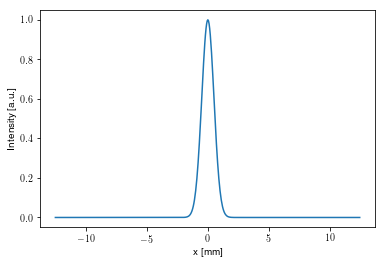

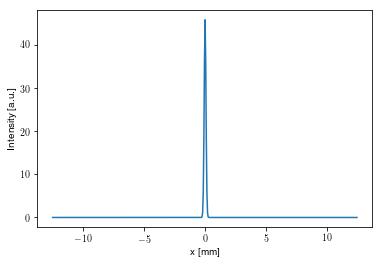

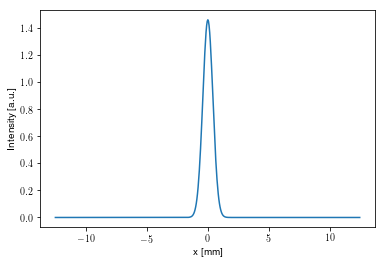

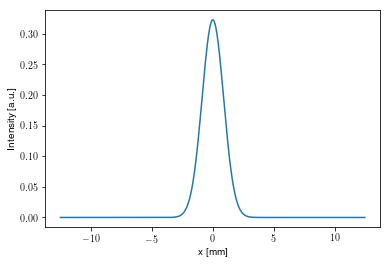

/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


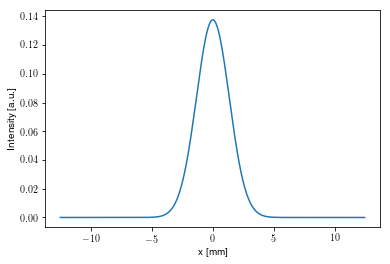

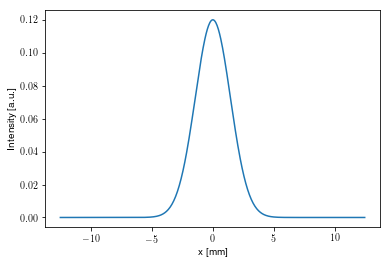

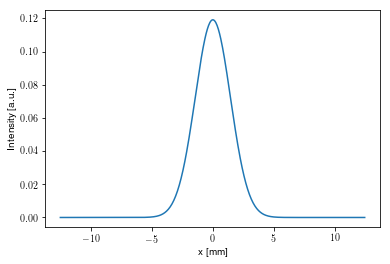

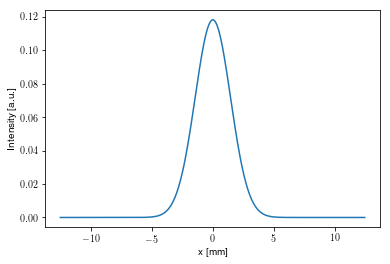

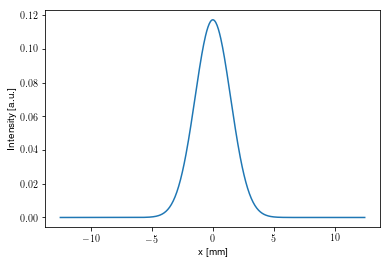

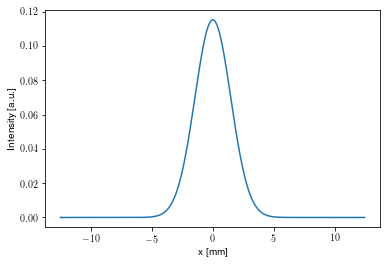

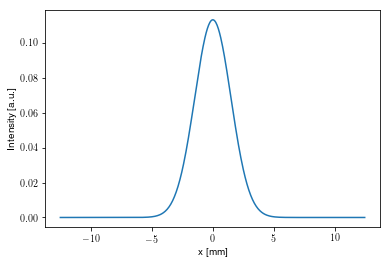

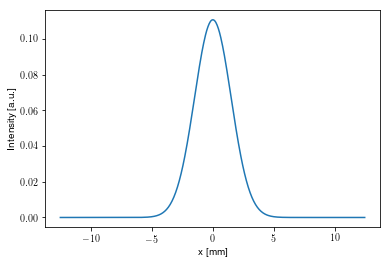

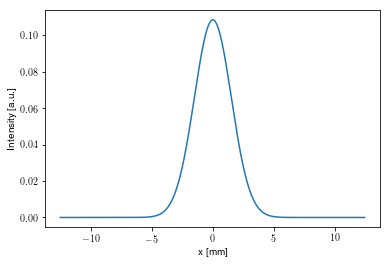

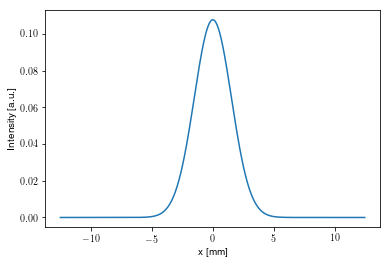

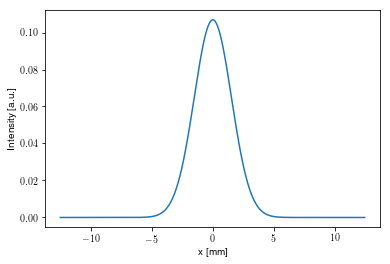

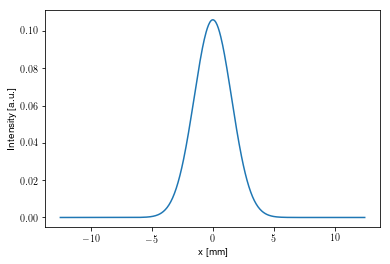

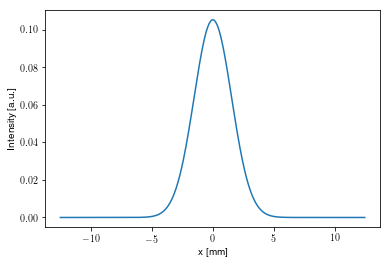

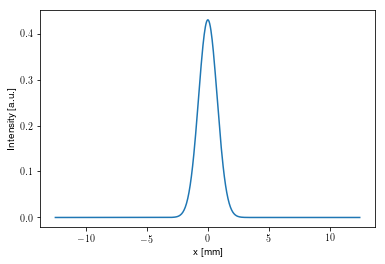

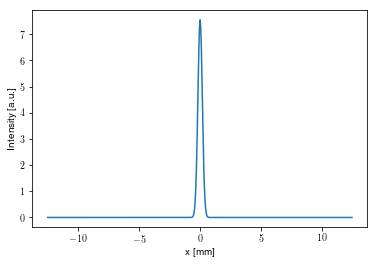

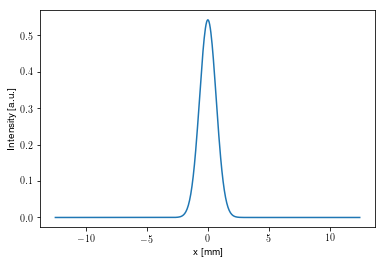

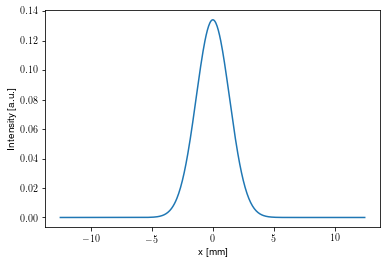

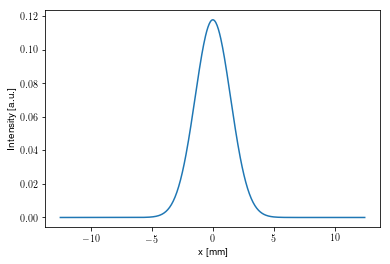

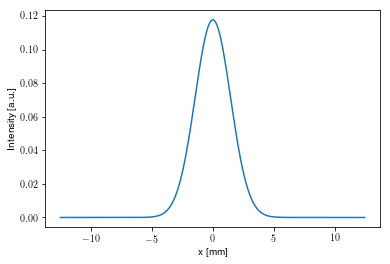

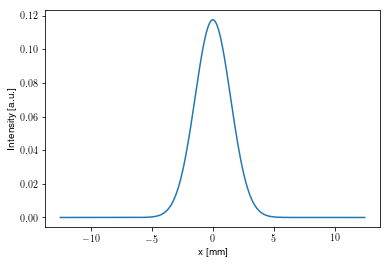

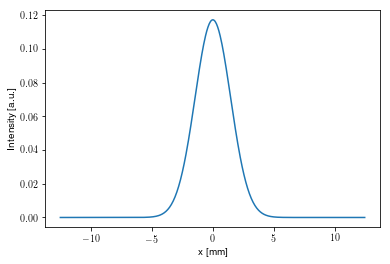

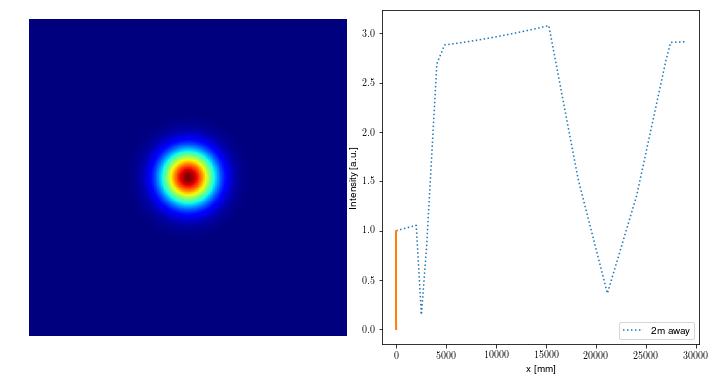

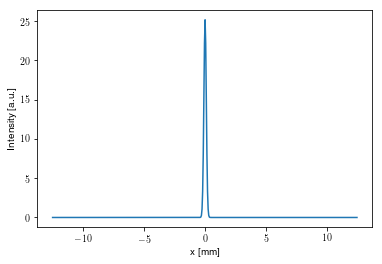

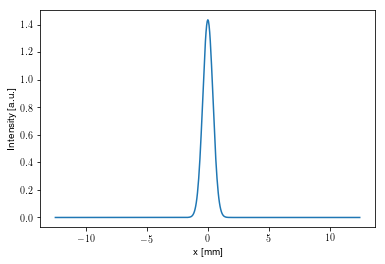

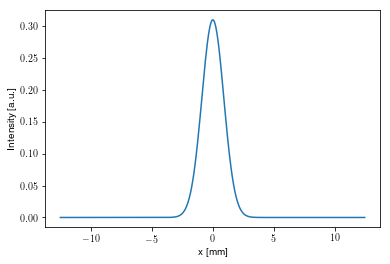

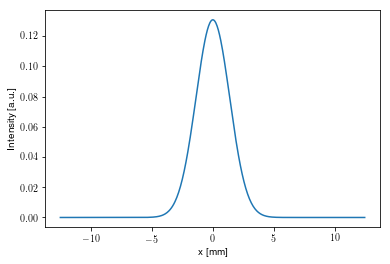

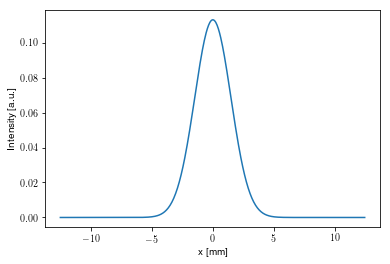

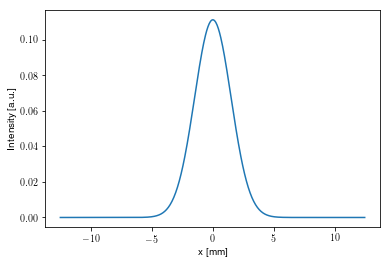

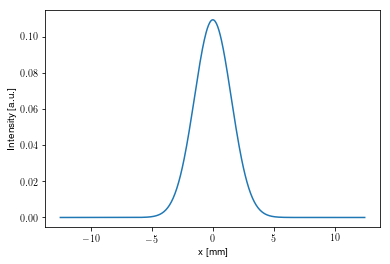

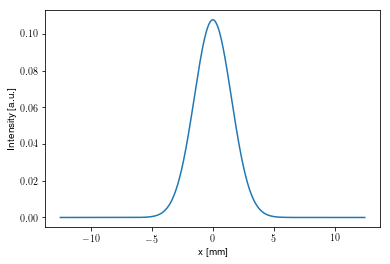

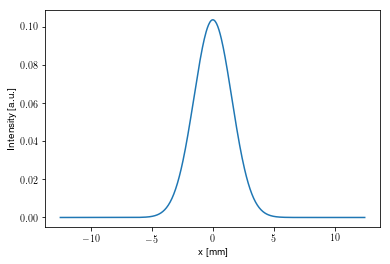

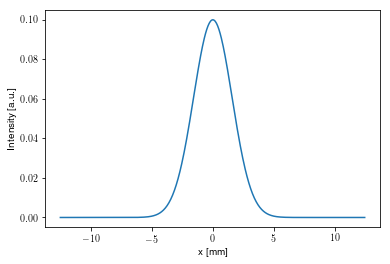

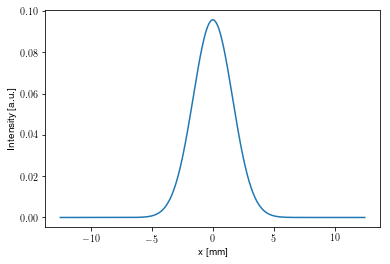

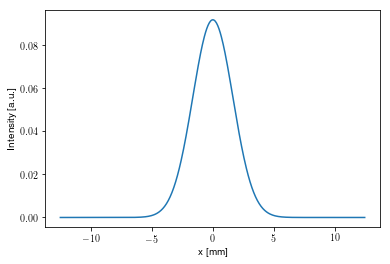

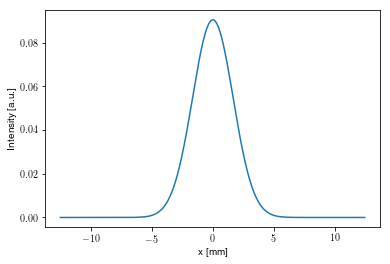

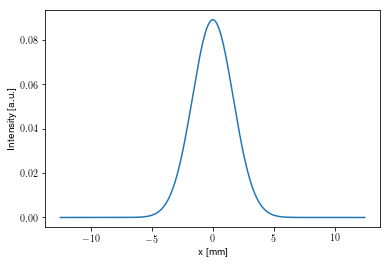

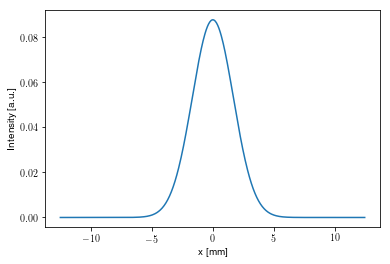

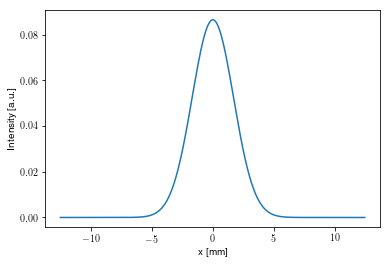

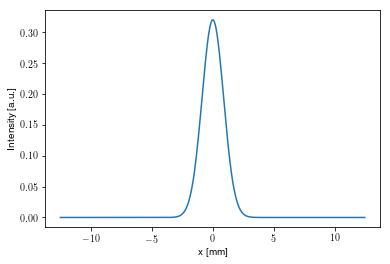

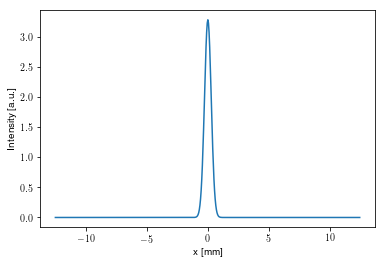

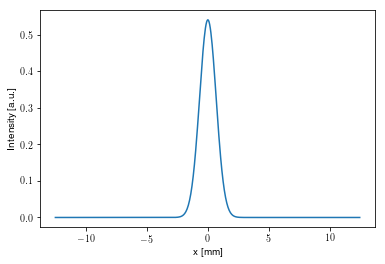

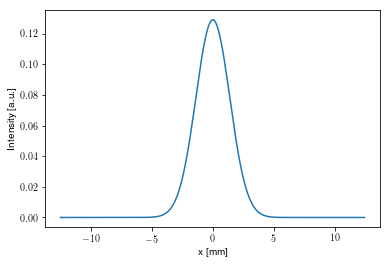

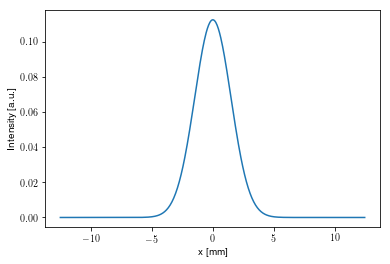

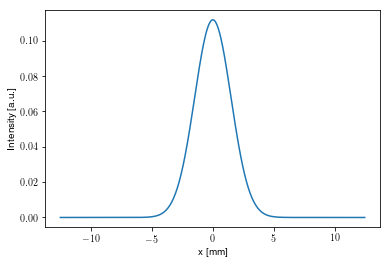

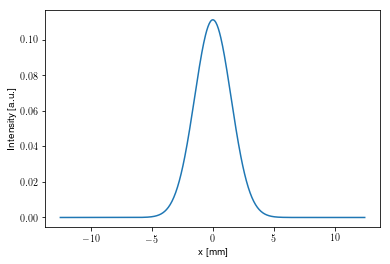

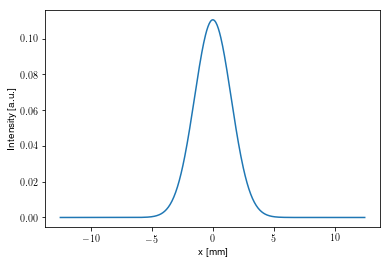

0 0.998504038681 0.998504038681 0 0.0
1 1.05352753812 1.12124510459 2000 0.0677175664671
2 0.14742041972 0.198988256329 2517 0.0515678366095
3 0.825515840949 0.833688290028 3034 0.00817244907874
4 1.757597371 1.7954132385 3551 0.037815867496
5 2.69160739269 2.76134297185 4068 0.0697355791584
6 2.88199856976 2.96997361086 4838.5 0.0879750410947
7 2.89236414501 2.99310309453 5609.0 0.100738949513
8 2.90342010173 3.0176681101 6379.5 0.114248008366
9 2.91515858453 3.04363389616 7150.0 0.128475311629
10 2.94046290289 3.09921618799 8680.25 0.1587532851
11 2.96835858523 3.15989876492 10210.5 0.191540179687
12 2.99877323925 3.22539372831 11740.75 0.226620489058
13 3.03163106344 3.29541417141 13271.0 0.26378310797
14 3.04295356969 3.3193740492 13774.075 0.276420479516
15 3.05452880837 3.34378261226 14277.150000000001 0.289253803893
16 3.06635392001 3.36863012639 14780.225000000002 0.302276206377
17 3.07842602966 3.39390694274 15283.300000000003 0.315480913076
18 1.52297387295 1.76421644931 1821

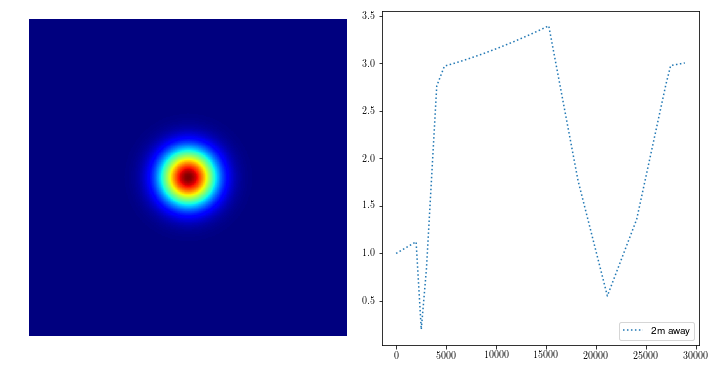

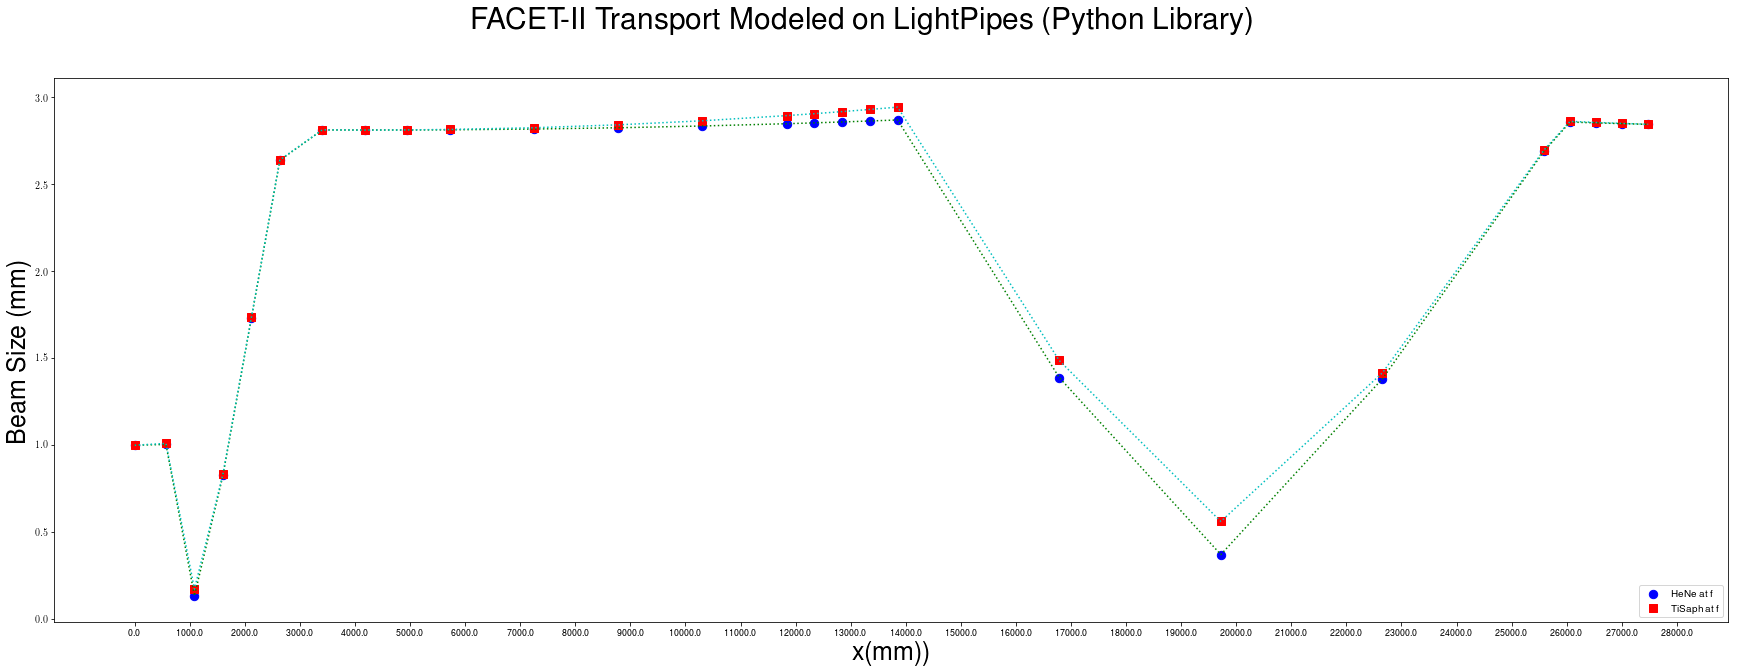

In [46]:
from itertools import cycle
import matplotlib.ticker as ticker
HeNe = facet_transport(25, 2000,527,5,0,0,'on', 2000)
TiSaph = facet_transport(25, 2000,800,5,0,0,'on',2000)

HeNe_close = facet_transport(15, 2000,527,1,0,0,'no', 27)
TiSaph_close = facet_transport(15, 2000,800,1,0,0,'no',27)

HeNe_f = facet_transport(15, 2000,527,1,0,0,'no', 568)
TiSaph_f = facet_transport(15, 2000,800,1,0,0,'no',568)

for i in range(len(HeNe[1])):
    print(i, HeNe[1][i], TiSaph[1][i], HeNe[0][i], np.abs(HeNe[1][i] - TiSaph[1][i]))
    
cycol = cycle('bgrcmk')
mapping = cycle('osD^v*.,')
pic = plt.figure(figsize=(30,10))
p = pic.add_subplot(111)

#p.scatter(HeNe[0], HeNe[1], c = next(cycol), label = 'HeNe Far Field', s=70, marker =next(mapping))
#p.plot(HeNe[0], HeNe[1], linestyle = ':', c = next(cycol))
#p.scatter(TiSaph[0], TiSaph[1], c = next(cycol), s=50, label = 'TiSaph Far Field', marker = next(mapping))
#p.plot(TiSaph[0], TiSaph[1], linestyle = '-.', c = next(cycol))

#p.scatter(HeNe_close[0], HeNe_close[1], c = next(cycol), label = 'HeNe at 27mm away from L1', s=70,marker =next(mapping))
#p.plot(HeNe_close[0], HeNe_close[1], linestyle = ':', c = next(cycol))
#p.scatter(TiSaph_close[0], TiSaph[1], color = 'green', s=50, label = 'TiSaph Far Field', marker =next(mapping))
#p.plot(TiSaph_close[0], TiSaph[1], linestyle = '-.', c = next(cycol))

p.scatter(HeNe_f[0], HeNe_f[1], c = next(cycol), label = 'HeNe at f', s=70,marker =next(mapping))
p.plot(HeNe_f[0], HeNe_f[1], linestyle = ':', c = next(cycol))
p.scatter(TiSaph_f[0], TiSaph_f[1], c = next(cycol), label = 'TiSaph at f', s=70,marker =next(mapping))
p.plot(TiSaph_f[0], TiSaph_f[1], linestyle = ':', c = next(cycol))

p.legend(loc = 'lower right')
p.set_xlabel('x(mm))', fontsize=25)
p.set_ylabel('Beam Size (mm)',fontsize=25)
pic.suptitle('FACET-II Transport Modeled on LightPipes (Python Library)',fontsize=30)

p.xaxis.set_ticks(np.arange(min(HeNe[0]), max(HeNe[0])+1, 1000))
p.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
p.tick_params(axis = 'x', labelsize=9)


pic.savefig('comparison of start points effects.pdf')

#plt.imshow()

Waists
Element id 	 HeNe at f 	 HeNe at M1 (27mm away from L1) 	 $\Delta$
0 	 0.998501879253 	 0.998501879253 		 0.0
1 	 1.00305171447 	 0.998512182372 		 0.00453953209822
2 	 0.130934346927 	 0.125111698016 		 0.00582264891039
3 	 0.824733026687 	 0.836646505558 		 0.0119134788716
4 	 1.73067405279 	 1.74642458808 		 0.0157505352953
5 	 2.6386149433 	 2.65814172538 		 0.019526782081
6 	 2.81311657058 	 2.82922498438 		 0.0161084137987
7 	 2.81268358371 	 2.8246319624 		 0.0119483786911
8 	 2.81300169484 	 2.82078060511 		 0.00777891027236
9 	 2.81407028588 	 2.81767349261 		 0.00360320673299
10 	 2.81841364537 	 2.81371833727 		 0.00469530810713
11 	 2.82570018751 	 2.81272122099 		 0.0129789665169
12 	 2.83590664479 	 2.81468464681 		 0.0212219979706
13 	 2.84900175428 	 2.81960259458 		 0.0293991596993
14 	 2.8539312279 	 2.82186234811 		 0.0320688797875
15 	 2.85916609817 	 2.82443911287 		 0.0347269853006
16 	 2.86470782458 	 2.82733198111 		 0.0373758434625
17 	 2.87055124387 	 2

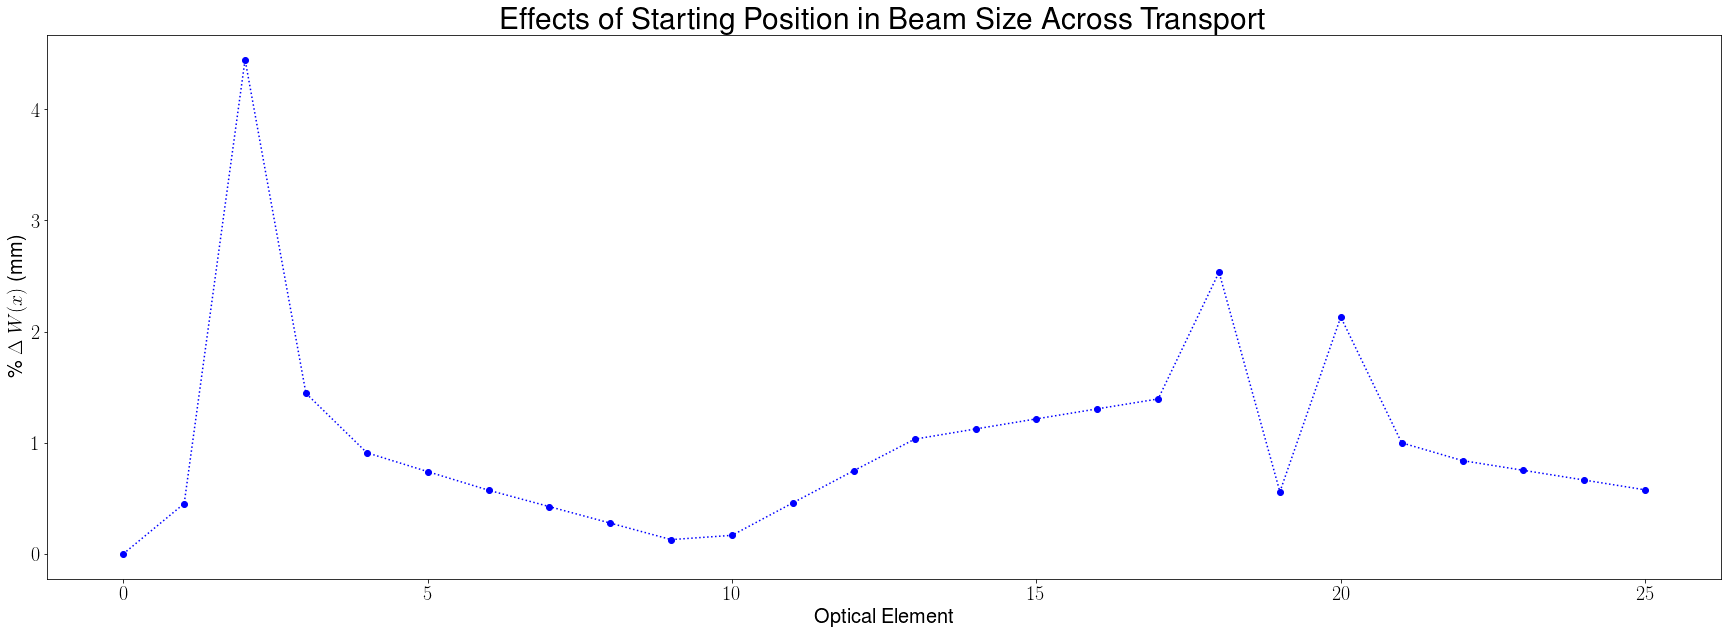

In [143]:
cycol = cycle('bgrcmk')
mapping = cycle('osD^v*.,')
pic = plt.figure(figsize=(30,10))
p = pic.add_subplot(111)


diff_w = []
print('Waists') 
print("Element id", '\t',"HeNe at f", '\t', "HeNe at M1 (27mm away from L1)", '\t', r"$\Delta$")
for i in range(len(HeNe_f[1])):
    print(i, '\t', HeNe_f[1][i], '\t', HeNe_close[1][i], '\t' '\t', (np.abs(HeNe_f[1][i]-HeNe_close[1][i])))
    diff_w.append(100*(np.abs(HeNe_f[1][i]-HeNe_close[1][i]))/HeNe_f[1][i])
    
plt.plot(diff_w,linestyle = ':', marker = 'o', color = 'blue')
plt.ylabel(' \% $\Delta$ $W(x)$ (mm) ', fontsize = 20)
plt.xlabel('Optical Element',fontsize = 20)
plt.title('Effects of Starting Position in Beam Size Across Transport', fontsize=30)
plt.tick_params(axis = 'both', labelsize=20)

14.8127022861


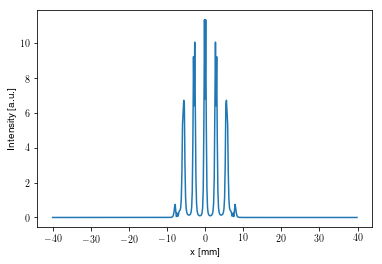

4.85183818099


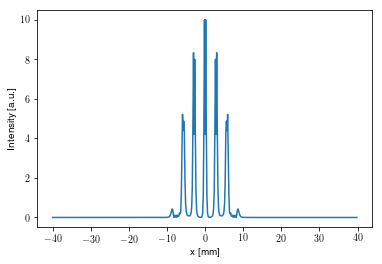

4.88685340248


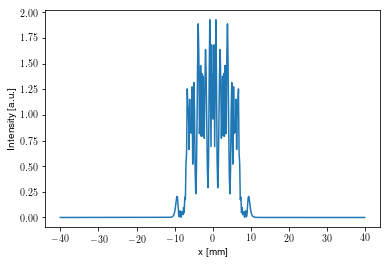

4.94000571257


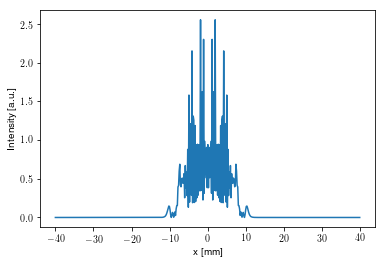

5.0192350176


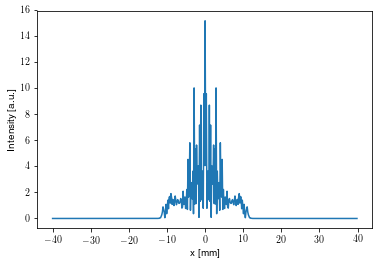

4.58668681799


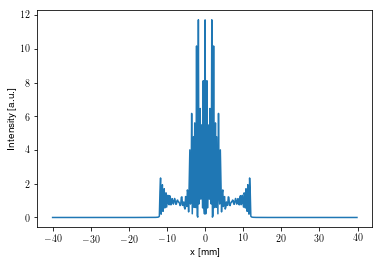

4.42708796699


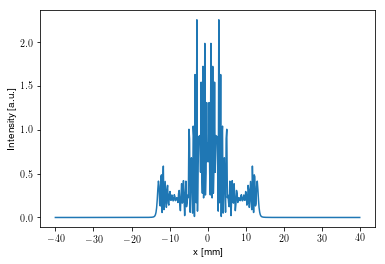

5.45871692316


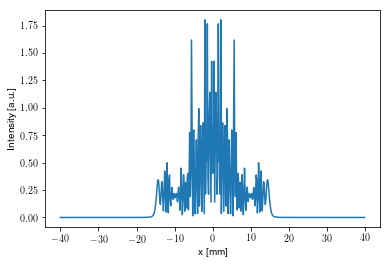

7.02391788234
[ 2965.5  3736.   4506.5  5277. ]
0 14.9774972263
1 14.9774984512
2 14.9645957063
3 15.0125687839
4 15.1235952774
5 15.3013145729
6 14.9453077398
7 14.7078747603
8 14.6560063392
9 14.8127022861
10 14.8127022861
11 4.85183818099
12 4.88685340248
13 4.94000571257
14 5.0192350176
15 9.17337363599
16 8.85417593397
17 10.9174338463
18 14.0478357647
0 0
1 949.75
2 1331.5
3 1713.25
4 2095.0
5 2965.5
6 3736.0
7 4506.5
8 5277.0


ValueError: x and y must be the same size

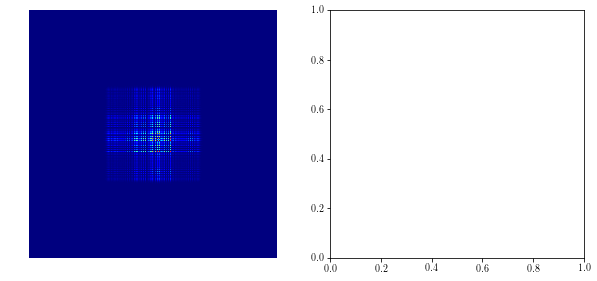

In [47]:
#Field = GaussAperture(R,xs,ys,1,Field)
Field = GaussHermite(0, 0, 1, R, Field)

#####
Field = Forvard(568*mm, Field)
NewGridDimension=int(GridDimension/4)
Field=Interpol(GridSize,NewGridDimension,0,0,0,1,Field)

tmp_x = []
for i in range(NewGridDimension):
    tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm) 

arr = [tmp_x, I[int(NewGridDimension/2)]]
popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
print(2*popt[2])
waist_values.append(2*popt[2])


f1 = 568*mm
f2 = 1600*mm
f_relay = 6200*mm
#let's put the lens
Field = Lens(f1,0,0,Field)


drift_l1_m2 = [381.75]*4


for i in drift_l1_m2:
    Field =Forvard(i*mm, Field)
    
    NewGridDimension=int(GridDimension/4)
    Field=Interpol(GridSize,NewGridDimension,0,0,0,1,Field)
    I=Intensity(0,Field)
    tmp_x = []
    for i in range(NewGridDimension):
        tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm)
    plt.plot(tmp_x,I[int(NewGridDimension/2)])
    plt.xlabel('x [mm]')
    plt.ylabel('Intensity [a.u.]')
    plt.show()
    
    arr = [tmp_x, I[int(NewGridDimension/2)]]
    popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
    print(popt[2])
    waist_values.append(popt[2])
    
Field = Forvard(100*mm, Field)

Field = Lens(f2,0,0,Field)

drift_l2_m3 = [770.5]*4

for i in drift_l2_m3:
    Field =Forvard(i*mm, Field)
    
    NewGridDimension=int(GridDimension/4)
    Field=Interpol(GridSize,NewGridDimension,0,0,0,1,Field)
    I=Intensity(0,Field)
    tmp_x = []
    for i in range(NewGridDimension):
        tmp_x.append((-GridSize/2+i*GridSize/NewGridDimension)/mm)
    
    plt.plot(tmp_x,I[int(NewGridDimension/2)])
    plt.xlabel('x [mm]')
    plt.ylabel('Intensity [a.u.]')
    plt.show()

    
    arr = [tmp_x, I[int(NewGridDimension/2)]]
    popt, pcov = curve_fit(gaussian, tmp_x, I[int(NewGridDimension/2)])
    print(popt[2])
    waist_values.append(2*popt[2])


first_drifts = np.arange(949.75, 2100, 381.75)

pos = [0]

for i in first_drifts:
    pos.append(i)
    

second_drifts = np.arange(2195+770.5, 5377, 770.5)

print(second_drifts)

for i in second_drifts:
    pos.append(i)

for i in range(len(waist_values)):
    print(i, waist_values[i])

for i in range(len(pos)):
    print(i, pos[i])

I=Intensity(0,Field)

jet = plt.figure(figsize=(10,10))
j0 = jet.add_subplot(221)
j0.imshow(I, cmap='jet'); plt.axis('off')
j1 = jet.add_subplot(222)
j1.scatter(pos, waist_values)

